Acoustic system calibration
===========================

Since the calibration measurements may be dealing with very small values, there's potential for running into the limitations of <a href="https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html">floating-point arithmetic</a>.  When implementing the computational algorithms, using dB is recommended to avoid floating-point errors.

Throughout this description, we express sensitivity (e.g. of the microphone or speaker) in units of $\frac{V}{Pa}$ (which is commonly used throughout the technical literature) rather than the notation used in the EPL cochlear function test suite which are $\frac{Pa}{V}$.  Sensitivity in the context of microphones is the voltage generated by the microphone in response to a given pressure.  In the context of speakers, sensitivity is the output, in Pa, produced by a given voltage.  We assume that the sensitivity of the calibration microphone is uniform across all frequencies (and it generally is if you spend enough money on the microphone).  Sometimes you may wish to use a cheaper microphone to record audio during experiments. Since this microphone is cheap, sensitivity will vary as a function of frequency.

Calculating the frequency response
----------------------------------

Using a hamming window for the signal is strongly recommended.  The only exception is when measuring the sensitivity of the calibration microphone using a standard (e.g. a pistonphone that generates 114 dB SPL at 1 kHz).  When you're using a single-tone calibration, a flattop window is best.

Speaker output
--------------

Output of speaker in Pa, $O(\omega)$, can be measured by playing a signal with known RMS voltage, $V_{speaker}(\omega)$ and measuring the voltage of a calibration microphone, $V_{cal}(\omega)$, with a known sensitivity, $S_{cal} = \frac{V_{rms}}{Pa}$.

$O(\omega) = \frac{V_{cal}(\omega)}{S_{cal}}$

Alternatively, the output can be specified in dB

$O_{dB}(\omega) = 20 \times log_{10}(\frac{V_{cal}(\omega)}{S_{cal}})$

$O_{dB}(\omega) = 20 \times log_{10}(V_{cal}(\omega))-20 \times log_{10}(S_{cal})$

Experiment microphone sensitivity
--------------------------------------

If we wish to calibrate an experiment microphone, we will record the voltage, $V_{exp}(\omega)$, at the same time we measure the speaker's output in the previous exercise. Using the known output of the speaker, we can then determine the experiment microphone sensitivity, $S_{exp}(\omega)$. 

$S_{exp}(\omega) = \frac{V_{exp}(\omega)}{O(\omega)}$

$S_{exp}(\omega) = \frac{V_{exp}(\omega)}{\frac{V_{cal}(\omega)}{S_{cal}}}$

$S_{exp}(\omega) = \frac{V_{exp}(\omega) \times S_{cal}}{V_{cal}(\omega)}$

The resulting sensitivity is in $\frac{V}{Pa}$.  Alternatively the sensitivity can be expressed in dB, which gives us sensitivity as dB re Pa.

$S_{exp_{dB}}(\omega) = 20 \times log_{10}(V_{exp})+20 \times log_{10}(S_{cal})-20 \times log_{10}(V_{cal})$

In-ear speaker calibration
--------------------------

Since the acoustics of the system will change once the experiment microphone is inserted in the ear (e.g. the ear canal acts as a compliance which alters the harmonics of the system), we need to recalibrate each time we reposition the experiment microphone while it's in the ear of an animal.  We need to compute the speaker transfer function, $S_{s}(\omega)$, in units of $\frac{V_{rms}}{Pa}$ which will be used to compute the actual voltage needed to drive the speaker at a given level.  To compute the calibration, we generate a stimulus via the digital to analog converter (DAC) with known frequency content, $V_{DAC}(\omega)$, in units of $V_{RMS}$.

The output of the speaker is measured using the experiment microphone and can be determined using the experiment microphone sensitivity

$O(\omega) = \frac{V_{PT}(\omega)}{S_{PT}(\omega)}$

The sensitivity of the speaker can then be calculated as

$S_{s}(\omega) = \frac{V_{DAC}(\omega)}{O(\omega)}$

$S_{s}(\omega) = \frac{V_{DAC}(\omega)}{\frac{V_{PT}(\omega)}{S_{PT}(\omega)}}$

$S_{s}(\omega) = \frac{V_{DAC}(\omega) \times S_{PT}(\omega)}{V_{PT}(\omega)}$

Alternatively, we can express the sensitivity as dB

$S_{s_{dB}}(\omega) = 20 \times log_{10}(V_{DAC}(\omega))+20 \times log_{10}(S_{PT}(\omega))-20 \times log_{10}(V_{PT}(\omega))$

$S_{s_{dB}}(\omega) = 20 \times log_{10}(V_{DAC}(\omega))+S_{PT_{dB}}(\omega)-20 \times log_{10}(V_{PT}(\omega))$

Generating a tone at a specific level
-------------------------------------

Given the speaker sensitivity, $S_{s}(\omega)$, we can compute the voltage at the DAC required to generate a tone at a specific amplitude in Pa, $O$.

$V_{DAC}(\omega) = S_{s}(\omega) \times O$

Usually, however, we generally prefer to express the amplitude in dB SPL.

$O_{dB SPL} = 20 \times log_{10}(\frac{O}{20 \times 10^{-6}})$

Solving for $O$.

$O = 10^{\frac{O_{dB SPL}}{20}} \times 20 \times 10^{-6}$

Substituting $O$.

$V_{DAC}(\omega) = S_{s}(\omega) \times 10^{\frac{O_{dB SPL}}{20}} \times 20 \times 10^{-6}$

Expressed in dB

$V_{DAC_{dB}}(\omega) = 20 \times log_{10}(S_{s}(\omega)) + 20 \times log_{10}(10^{\frac{O_{dB SPL}}{20}}) + 20 \times log_{10}(20 \times 10^{-6})$

$V_{DAC_{dB}}(\omega) = 20 \times log_{10}(S_{s}(\omega)) + O_{dB SPL} + 20 \times log_{10}(20 \times 10^{-6})$

$V_{DAC_{dB}}(\omega) = S_{s_{dB}}(\omega) + O_{dB SPL} + 20 \times log_{10}(20 \times 10^{-6})$

We can use the last equation to compute the voltage since it expresses the speaker calibration in units that we have calculated.  However, we need to convert the voltage back to a linear scale.

$V_{DAC}(\omega) = 10^{\frac{S_{s_{dB}}(\omega) + O_{dB SPL} + 20 \times log_{10}(20 \times 10^{-6})}{20}}$

Estimating output at a specific $V_{rms}$
-----------------------------------------

Taking the equation above and solving for $O_{dB SPL}(\omega)$

$O_{dB SPL}(\omega) = 20 \times log_{10}(V_{DAC}) - S_{s_{dB}}(\omega) - 20 \times log_{10}(20 \times 10^{-6})$

Or, if we want to compute in Pa

$O(\omega) = \frac{V_{DAC}}{S_{s}(\omega)}$

Common calculations based on $S_{s_{dB}}(\omega)$ and $S_{PT_{dB}}(\omega)$
---------------------------------------------------------------------------

To estimate the voltage required at the DAC for a given dB SPL

$V_{DAC}(\omega) = 10^{\frac{S_{s_{dB}}(\omega) + O_{dB SPL} + 20 \times log_{10}(20 \times 10^{-6})}{20}}$

To convert the microphone voltage measurement to dB SPL

$O_{dB SPL} = V_{DAC_{dB}}(\omega) - S_{PT_{dB}}(\omega) - 20 \times log_{10}(20 \times 10^{-6})$

Given the dB SPL, $O_{dB SPL}(\omega)$ at 1 VRMS

$S(\omega) = (10^{\frac{O_{dB SPL}(\omega)}{20}} \times 20 \times 10^{-6})^{-1}$

$S_{dB}(\omega) =  - [O_{dB SPL}(\omega) + 20 \times log_{10}(20 \times 10^{-6})]$

Less common calculations
------------------------
Given sensitivity calculated using a different $V_{rms}$, $x$, (e.g. $10 V_{rms}$), compute the sensitivity at $1 V_{rms}$ (used by the attenuation calculation in the neurogen package).

$S_{dB}(\omega) = S_{dB_{1V}}(\omega) = S_{dB_{x}}(\omega) - 20 \times log_{10}x$

Estimating the PSD
==================

Applying a window to the signal is not always a good idea.

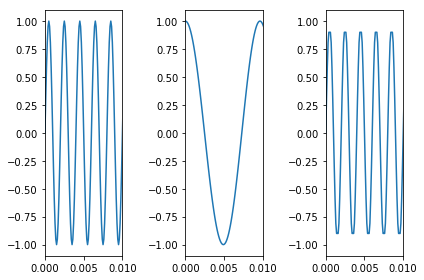

In [3]:
%matplotlib inline
from scipy import signal
import pylab as pl
import numpy as np

fs = 10e3
t = np.arange(fs)/fs
frequency = 500
tone_waveform = np.sin(2*np.pi*frequency*t)
chirp_waveform = signal.chirp(t, 100, 1, 900)
clipped_waveform = np.clip(tone_waveform, -0.9, 0.9)

ax = pl.subplot(131)
ax.plot(t, tone_waveform)
ax = pl.subplot(132, sharex=ax, sharey=ax)
ax.plot(t, chirp_waveform)
ax = pl.subplot(133, sharex=ax, sharey=ax)
ax.plot(t, clipped_waveform)
ax.axis(xmin=0, xmax=0.01)
pl.tight_layout()

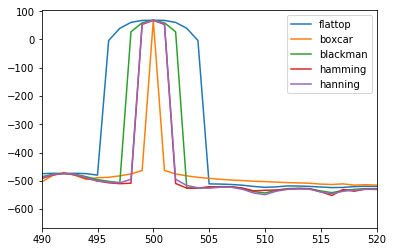

In [4]:
s = tone_waveform
for window in ('flattop', 'boxcar', 'blackman', 'hamming', 'hanning'):
    w = signal.get_window(window, len(s))
    csd = np.fft.rfft(s*w/w.mean())
    psd = np.real(csd*np.conj(csd))/len(s)
    p = 20*np.log10(psd)
    f = np.fft.rfftfreq(len(s), fs**-1)
    pl.plot(f, p, label=window)
pl.axis(xmin=490, xmax=520)
pl.legend()

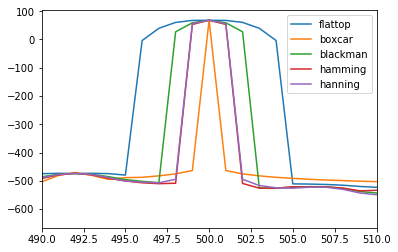

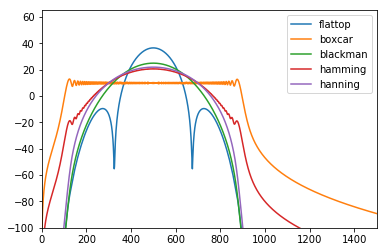

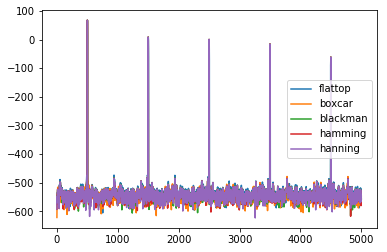

In [5]:
def plot_fft_windows(s):
    for window in ('flattop', 'boxcar', 'blackman', 'hamming', 'hanning'):
        w = signal.get_window(window, len(s))
        csd = np.fft.rfft(s*w/w.mean())
        psd = np.real(csd*np.conj(csd))/len(s)
        p = 20*np.log10(psd)
        f = np.fft.rfftfreq(len(s), fs**-1)
        pl.plot(f, p, label=window)
    pl.legend()
    
pl.figure(); plot_fft_windows(tone_waveform); pl.axis(xmin=490, xmax=510)
pl.figure(); plot_fft_windows(chirp_waveform); pl.axis(xmin=0, xmax=1500, ymin=-100)
pl.figure(); plot_fft_windows(clipped_waveform);

Designing an output circuit
===========================

Speaker sensitivity is typically reported in $\frac{dB}{W}$ at a distance of 1 meter.  For an $8\Omega$ speaker, $2.83V$ produces exactly $1W$.  We know this because $P = I^2 \times R$ and $V = I \times R$.  Solving for $I$:

$I = \sqrt{\frac{P}{R}}$ and $I = \frac{V}{R}$

$\sqrt{\frac{P}{R}} = \frac{V}{R}$

$P = \frac{V^2}{R}$

$V = R \times \sqrt{\frac{P}{R}}$

In [6]:
print(0.5**2*8)

2.0


In [7]:
R = 8
P = 1
V = 2.83

print('Voltage is', R*np.sqrt(P/R))
print('Power is', V**2/R)

Voltage is 2.82842712475
Power is 1.0011125


Let's say we have an $8\Omega$ speaker with a handling capacity is $0.5W$.  If we want to achieve the *maximum* (i.e. $0.5W$), then we need to determine the voltage that will achieve that wattage given the speaker rating.

$V = R \times \sqrt{\frac{P}{R}}$

$V = 8\Omega \times \sqrt{\frac{0.5W}{8\Omega}}$

$V = 2V$

Even if your system can generate larger values, there is *no point* in driving the speaker at values greater than 1V.  It will simply distort or get damaged.  However, your system needs to be able to provide the appropriate current to drive the speaker.

$I = \sqrt{\frac{P}{R}}$

$I = \sqrt{\frac{0.5W}{8\Omega}}$

$I = 0.25A$

This is based on *nominal* specs.

So, what is the *maximum* output in *dB SPL*?  Assume that the spec sheet reports $92dB$ at $0.3W$.

$10 \times log_{10}(0.5W/0.3W) = 2.2 dB$

This means that we will get only $2.2dB$ more for a total of $94.2 dB SPL$.

$10 \times log_{10}(0.1W/0.3W) = -4.7 dB$

In [8]:
P = 0.5
R = 8
print('Voltage is', R*np.sqrt(P/R))
print('Current is', np.sqrt(P/R))

Voltage is 2.0
Current is 0.25


In [9]:
P_test = 0.1
P_max = 1
O_test = 90

dB_incr = 10*np.log10(P_max/P_test)
O_max = O_test+dB_incr

print('{:0.2f} dB increase giving {:0.2f} max output'.format(dB_incr, O_max))

10.00 dB increase giving 100.00 max output


Now that you've figured out the specs of your speaker, you need to determine whether you need a voltage divider to bring output voltage down to a safe level (especially if you are trying to use the full range of your DAC).

$V_{speaker} = V_{out} \times \frac{R_{speaker}}{R+R_{speaker}}$

Don't forget to compensate for any gain you may have built into the op-amp and buffer circuit.

$R = \frac{R_{speaker} \times (V_{out}-V_{speaker})}{V_{speaker}}$

In [10]:
P_max = 0.3  # rated long-term capacity of the speaker
R = 8  #
V = R * np.sqrt(P_max/R)
print('{:0.2f} max safe long-term voltage'.format(V))

P_max = 0.5  # rated long-term capacity of the speaker
R = 8  #
V = R * np.sqrt(P_max/R)
print('{:0.2f} max safe short-term voltage'.format(V))

1.55 max safe long-term voltage
2.00 max safe short-term voltage


In [11]:
R_speaker = 8
V_speaker = 2
V_out = 10
R = (R_speaker*(V_out-V_speaker))/V_speaker
print('Series divider resistor is {:.2f}'.format(R))

Series divider resistor is 32.00


# Good details here http://www.dspguide.com/ch9/1.htm

25.0
20.833333333333336
416.6666666666667 420.0


(-2500.0, 1000, -692.54649821866428, 102.44563902596985)

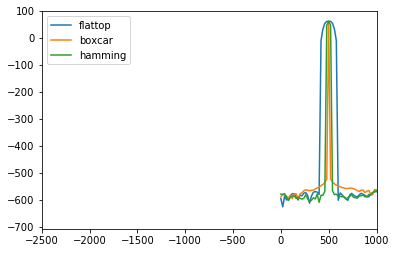

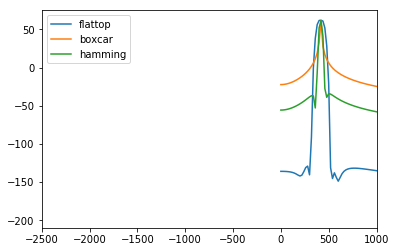

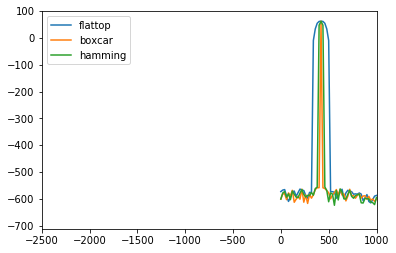

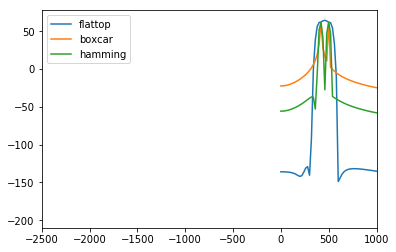

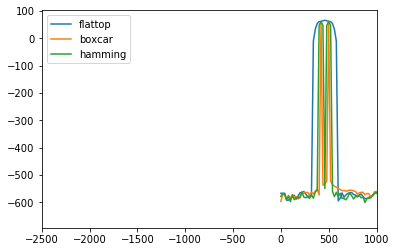

In [12]:
def plot_fft_windows(s):
    for window in ('flattop', 'boxcar', 'hamming'):
        w = signal.get_window(window, len(s))
        csd = np.fft.rfft(s*w/w.mean())
        psd = np.real(csd*np.conj(csd))/len(s)
        p = 20*np.log10(psd)
        f = np.fft.rfftfreq(len(s), fs**-1)
        pl.plot(f, p, label=window)
    pl.legend()
    
    
fs = 100e3
duration = 50e-3
t = np.arange(int(duration*fs))/fs

f1 = 500
f2 = f1/1.2
print(duration*f1)
print(duration*f2)

coerced_f2 = np.round(duration*f2)/duration
print(f2, coerced_f2)

t1 = np.sin(2*np.pi*f1*t)
t2 = np.sin(2*np.pi*f2*t)
t2_coerced = np.sin(2*np.pi*coerced_f2*t)

pl.figure(); plot_fft_windows(t1); pl.axis(xmax=f1*2)
pl.figure(); plot_fft_windows(t2); pl.axis(xmax=f1*2)
pl.figure(); plot_fft_windows(t2_coerced); pl.axis(xmax=f1*2)
pl.figure(); plot_fft_windows(t1+t2); pl.axis(xmax=f1*2)
pl.figure(); plot_fft_windows(t1+t2_coerced); pl.axis(xmax=f1*2)

# Size of the FFT

In [12]:
n = 50e3
npow2 = 2**np.ceil(np.log2(n))

In [14]:
s = np.random.uniform(-1, 1, size=n)
spow2 = np.random.uniform(-1, 1, size=npow2)
%timeit np.fft.fft(s)
%timeit np.fft.fft(spow2)

1000 loops, best of 3: 960 µs per loop
1000 loops, best of 3: 1.56 ms per loop


# Ensuring reproducible generation of bandpass filtered noise

In [15]:
rs = np.random.RandomState(seed=1)
a1 = rs.uniform(-1, 1, 5000)
a2 = rs.uniform(-1, 1, 5000)
rs = np.random.RandomState(seed=1)
b1 = rs.uniform(-1, 1, 3330)
b2 = rs.uniform(-1, 1, 3330)
b3 = rs.uniform(-1, 1, 10000-6660)
np.equal(np.concatenate((a1, a2)), np.concatenate((b1, b2, b3))).all()

True

In [16]:
b, a = signal.iirfilter(7, (1e3/5000, 2e3/5000), rs=85, rp=0.3, ftype='ellip', btype='band')

True


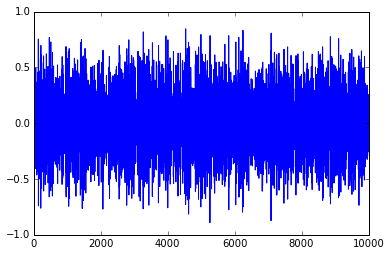

In [17]:
zi = signal.lfilter_zi(b, a)
a1f, azf1 = signal.lfilter(b, a, a1, zi=zi)
a2f, azf2 = signal.lfilter(b, a, a2, zi=azf1)
b1f, bzf1 = signal.lfilter(b, a, b1, zi=zi)
b2f, bzf2 = signal.lfilter(b, a, b2, zi=bzf1)
b3f, bzf3 = signal.lfilter(b, a, b3, zi=bzf2)
print(np.equal(np.concatenate((a1f, a2f)), np.concatenate((b1f, b2f, b3f))).all())
pl.plot(np.concatenate((b1f, b2f, b3f)))

False


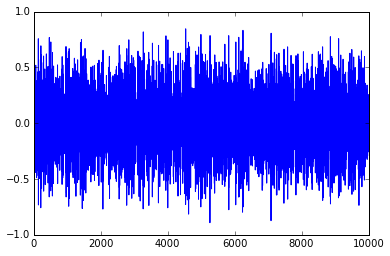

In [18]:
zi = signal.lfilter_zi(b, a)
a1f = signal.lfilter(b, a, a1)
a2f = signal.lfilter(b, a, a2)
b1f = signal.lfilter(b, a, b1)
b2f = signal.lfilter(b, a, b2)
b3f = signal.lfilter(b, a, b3)
print(np.equal(np.concatenate((a1f, a2f)), np.concatenate((b1f, b2f, b3f))).all())
pl.plot(np.concatenate((b1f, b2f, b3f)))

# Computing noise power

In [19]:
from scipy import integrate

In [20]:
frequency = np.fft.rfftfreq(int(100e3), 1/100e3)
mask = (frequency >= 4e3) & (frequency < 8e3)
for noise_floor in (-20, -10, 0, 10, 20, 30, 40, 50, 60):
    power_db = np.ones_like(frequency)*noise_floor
    power_db[mask] = 65
    power = (10**(power_db/20.0))*20e-6
    #power_sum = integrate.trapz(power**2, frequency)**0.5
    power_sum = np.sum(power**2)**0.5
    total_db = 20*np.log10(power_sum/20e-6)
    print('{}dB SPL with noise floor at {}dB SPL'.format(int(total_db), noise_floor))

101dB SPL with noise floor at -20dB SPL
101dB SPL with noise floor at -10dB SPL
101dB SPL with noise floor at 0dB SPL
101dB SPL with noise floor at 10dB SPL
101dB SPL with noise floor at 20dB SPL
101dB SPL with noise floor at 30dB SPL
101dB SPL with noise floor at 40dB SPL
102dB SPL with noise floor at 50dB SPL
107dB SPL with noise floor at 60dB SPL


1.12674830757
RMS power, dB SPL 95.015938375


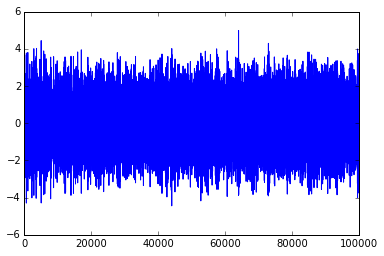

In [21]:
# Compute power in dB then convert to power in volts
power_db = np.ones_like(frequency)*30
power_db[mask] = 65

power = (10**(power_db/20.0))*20e-6
psd = power/2*len(power)*np.sqrt(2)

phase = np.random.uniform(0, 2*np.pi, len(psd))
csd = psd*np.exp(-1j*phase)

signal = np.fft.irfft(csd) 
pl.plot(signal)
rms = np.mean(signal**2)**0.5
print(rms)
print('RMS power, dB SPL', 20*np.log10(rms/20e-6))

In [22]:
signal = np.random.uniform(-1, 1, len(power_v))
rms = np.mean(signal**2)**0.5
20*np.log10(rms/20e-6)
csd = np.fft.rfft(signal)
psd = np.real(csd*np.conj(csd))**2
print(psd[:5])
psd = np.abs(csd)**2
print(psd[:5])


NameError: name 'power_v' is not defined

# Analysis of grounding

Signal cables resonate when physical length is a quarter wavelength.

In [23]:
flb, fub = 100, 100e3

# resonant frequency of cable
c = 299792458 # speed of light in m/s
l = 3 # length of cable in meters

resonant_frequency = 1/(l*4/c)

In [24]:
flb, fub = 100, 100e3
llb = c/flb/4
lub = c/fub/4
print(llb, lub)

# As shown here, since we're not running cables for 750 meters,
# we don't have an issue.

749481.145 749.481145


In [25]:
c/resonant_frequency/4.0

2.9999999999999996

Resonance of acoustic tube

In [26]:
f = 14000.0 # Hz, cps
w = (1/f)*340.0

In [42]:
w*1e3 # resonance in mm assuming quarter wavelength is what's important

24.28571428571429

In [39]:
length = 20e-3

In [40]:
period = length/340.0
frequency = 1.0/period
frequency

17000.0

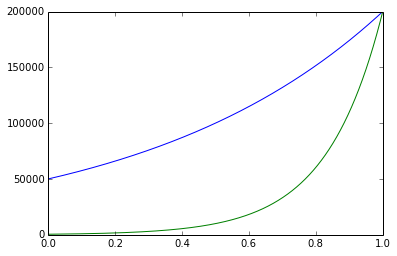

In [54]:
import numpy as np

def exp_ramp_v1(f0, k, t):
    return f0*k**t

def exp_ramp_v2(f0, f1, t):
    k = np.exp(np.log(f1/f0)/t[-1])
    return exp_ramp_v1(f0, k, t)

t = np.arange(10e3)/10e3
f0 = 0.5e3
f1 = 50e3
e1 = exp_ramp_v2(50e3, 200e3, t)
e2 = exp_ramp_v2(0.5e3, 200e3, t)

pl.plot(t, e1)
pl.plot(t, e2)

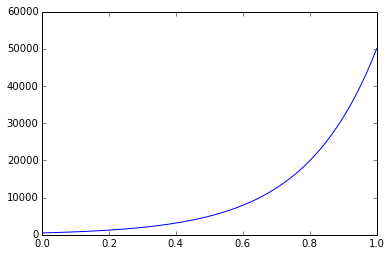

# chirps

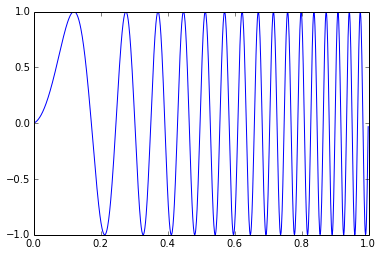

In [60]:
fs = 1000.0
f = np.linspace(1, 200, fs)
t = np.arange(fs)/fs

pl.plot(t, np.sin(f.cumsum()/fs))

In [67]:
(2*np.pi*f[-1]*t[-1]) % 2*np.pi

4.3367310737071643

In [69]:
(f.cumsum()[-1]/fs) % 2*np.pi

1.5707963267948519

# Converting band level to spectrum level


$BL = 10 \times log{\frac{I_{tot}}{I_{ref}}} $ where $ I_{tot} = I_{SL}*\Delta f$.  Using multiplication rule for logarigthms, $BL = 10 \times log{\frac{I_{SL} \times 1 Hz}{I_{ref}}} + 10 \times log \frac{\Delta f}{1 Hz}$ which simplifies to $BL = ISL_{ave}+ 10\times log(\Delta f)$

# Equalizing a signal using the impulse response

In [101]:
signal.iirfilter?

In [78]:
signal.freqs?

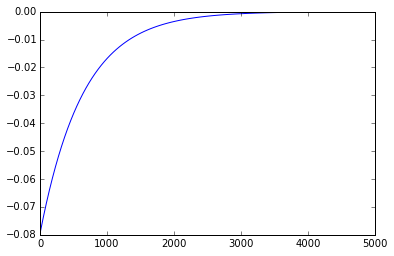

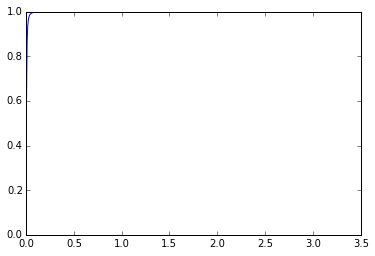

In [116]:
from scipy import signal

fs = 100e3

kwargs = dict(N=1, Wn=1e3/(2*fs), rp=0.4, rs=50, btype='highpass', ftype='ellip')
b, a = signal.iirfilter(analog=False, **kwargs)
ba, aa = signal.iirfilter(analog=True, **kwargs)

t, ir = signal.impulse([ba, aa], 50)
w, h = signal.freqz(b, a)
pl.figure()
pl.plot(t, ir)
pl.figure()
pl.plot(w, h)

In [117]:
rs = np.random.RandomState(seed=1)
noise = rs.uniform(-1, 1, 5000)

f = np.linspace(100, 25000, fs)
t = np.arange(fs)/fs
chirp = np.sin(f.cumsum()/fs)

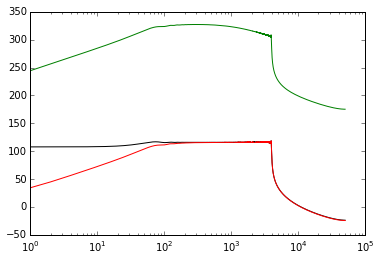

In [119]:
psd = np.abs(np.fft.rfft(chirp)**2)
freq = np.fft.rfftfreq(len(chirp), fs**-1)
pl.semilogx(freq, 20*np.log10(psd), 'k')

chirp_ir = signal.lfilter(b, a, chirp)
psd_ir = np.abs(np.fft.rfft(chirp_ir)**2)
pl.semilogx(freq, 20*np.log10(psd_ir), 'r')
#pl.axis(ymin=40, xmin=10, xmax=10000)

chirp_eq = signal.lfilter(ir**-1, 1, chirp_ir)
psd_eq = np.abs(np.fft.rfft(chirp_eq)**2)
pl.semilogx(freq, 20*np.log10(psd_eq), 'g')